In [6]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
# 支持中文，高清显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [7]:
def LoadData(path):
    files = os.listdir(path)
    flag = 1
    for i in range(len(files)):
        currentFile = path+str(i)+".jpg"
        #print(currentFile)
        img = Image.open(currentFile)
        imgGray = img.convert('L')
        imgArray =  np.array(imgGray)
        if (flag == 1):
            flag = 0
            data = imgArray.reshape([1, -1])
        else:
            data = np.append(data, imgArray.reshape([1, -1]), axis = 0)
    return data
path = "DataProcessed_Student/train/"
data = LoadData(path)
print("读取训练数据完成，数据大小为", data.shape)

读取训练数据完成，数据大小为 (15, 2500)


In [8]:
def d_ou(v1,v2):  #np.dot(v1,v2) == np.sum(v1*v2)
    v1=np.array(v1)
    v2=np.array(v2)
    return np.sqrt(np.dot((v1-v2),(v1-v2)))
    #return np.sqrt(np.sum((v1-v2)*(v1-v2)))

In [9]:
#使用scikit-learn库的PCA实现

PCA完成，选取前2特征，降维后的数据集大小为： (15, 2)
开始测试
与训练集的第 0 张照片的欧氏距离为： 2122.9358502121313
与训练集的第 1 张照片的欧氏距离为： 3187.0751592731244
与训练集的第 2 张照片的欧氏距离为： 3063.884580785909
与训练集的第 3 张照片的欧氏距离为： 3718.7926314175243
与训练集的第 4 张照片的欧氏距离为： 3228.9412402777803
与训练集的第 5 张照片的欧氏距离为： 2664.695152784395
与训练集的第 6 张照片的欧氏距离为： 2749.365150459012
与训练集的第 7 张照片的欧氏距离为： 2435.1847900343537
与训练集的第 8 张照片的欧氏距离为： 2857.998326475355
与训练集的第 9 张照片的欧氏距离为： 1764.8456076209025
与训练集的第 10 张照片的欧氏距离为： 1291.9704728180252
与训练集的第 11 张照片的欧氏距离为： 1437.899395797997
与训练集的第 12 张照片的欧氏距离为： 1510.5109238098032
与训练集的第 13 张照片的欧氏距离为： 57.40347935638689
与训练集的第 14 张照片的欧氏距离为： 1558.6045512718702
与测试图片欧氏距离最小的是 13 .jpg


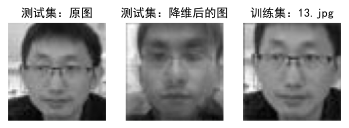

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

processedTrain = pca.transform(data)
print("PCA完成，选取前2特征，降维后的数据集大小为：", processedTrain.shape)

print("开始测试")
name = 0
img = Image.open("DataProcessed_Student/test/" + str(name) + ".jpg")
imgGray = img.convert('L')
test =  np.array(imgGray).reshape([1, -1])
processedTest = pca.transform(test)
#print(processedTest)
verify = processedTest

dis = []
minDis = 1e9
for i in range(processedTrain.shape[0]):
    dis.append(d_ou(processedTrain[i],verify[0]))
    print("与训练集的第", i, "张照片的欧氏距离为：", dis[i])
    if (dis[i] < minDis):
        minDis = dis[i]
        ansName = i
print("与测试图片欧氏距离最小的是", ansName, ".jpg")
#可视化
rawImg = test.reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = pca.inverse_transform(processedTest)
inverseImg = inverseData[0].reshape(50,50)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

trainImg = Image.open("DataProcessed_Student/train/" + str(ansName) + ".jpg")

fig = plt.figure()
ax0 = fig.add_subplot(231)
ax0.axis('off')
ax0.set_title("测试集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(232)
ax1.axis('off')
ax1.set_title("测试集：降维后的图")
ax1.imshow(inverseImg, cmap = "gray")
ax2 = fig.add_subplot(233)
ax2.axis('off')
ax2.set_title("训练集："+ str(ansName) + ".jpg")
ax2.imshow(trainImg, cmap = "gray")

In [ ]:
#以下为手写PCA

In [22]:
def PCA(X, components):
    # 去中心化
    XMeaned = X - np.mean(X, axis=0)
    # 计算协方差矩阵
    covMat = np.cov(XMeaned, rowvar=False)
    # 计算特征值和特征向量
    eigenValues, eigenVectors = np.linalg.eig(covMat)
    #eigenValues = np.real(eigenValues)
    #eigenVectors = np.real(eigenVectors)
    # 对特征值排序
    sortedIndex = np.argsort(eigenValues)[::-1]
    sortedEigenvalue = eigenValues[sortedIndex]
    sortedEigenvectors = eigenVectors[:,sortedIndex]
    # 取前 num_components 个特征向量
    eigenvectorSubset = np.real(sortedEigenvectors[:, 0:components])
    # 转换数据到新空间
    XReduced = np.dot(XMeaned, eigenvectorSubset)
    return XReduced,eigenvectorSubset
#输入数据 X 和要保留的主成分数 num_components。
#函数会首先对数据进行去中心化处理，然后计算协方差矩阵，接着求解特征值和特征向量，对特征值进行排序，选择前 num_components 个特征向量，
#最后将数据投影到这些特征向量所构成的新空间。函数返回投影后的数据 X_reduced。
processedTrain,eigenvectorSubset = PCA(data, 2)
processedTrain = processedTrain
print("PCA完成，选取前2特征，降维后的数据集大小为：", processedTrain.shape)

PCA完成，选取前2特征，降维后的数据集大小为： (15, 2)


In [23]:
def InversePCA(XReduced, eigenvectors, XMean):
    # 将数据从新空间转换回原始空间
    XOriginal = np.dot(eigenvectors, XReduced.T).T
    # 重新添加均值
    XOriginal = XOriginal + XMean
    return XOriginal
#函数接受三个参数：PCA主成分分析后得到的降维后的数据 X_reduced，
#PCA主成分分析得到的特征向量 eigenvectors，以及 PCA 主成分分析前原始数据的均值 X_mean。
#函数将数据从新空间转换回原始空间，然后重新添加均值，最后返回原始数据。

In [24]:
def TransformPCA(X, eigenvectors, XMean):
    #np.dot(eigenvectorSubset.T, X-XMean.T).T
    return np.dot(X-XMean, eigenvectors)

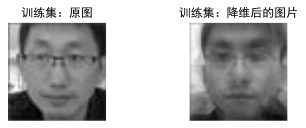

In [25]:
import matplotlib.pyplot as plt
# 支持中文，高清显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'


rawImg = data[13].reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = InversePCA(processedTrain, eigenvectorSubset, np.mean(data, axis=0))
inverseImg = inverseData[13].reshape(50,50)
#print(inverseImg)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.axis('off')
ax0.set_title("训练集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(222)
ax1.axis('off')
ax1.set_title("训练集：降维后的图片")
ax1.imshow(inverseImg, cmap = "gray")

与训练集的第 0 张照片的欧氏距离为： 2122.9215802866784
与训练集的第 1 张照片的欧氏距离为： 3187.0714117438106
与训练集的第 2 张照片的欧氏距离为： 3063.877856818104
与训练集的第 3 张照片的欧氏距离为： 3718.79100154673
与训练集的第 4 张照片的欧氏距离为： 3228.9387089921615
与训练集的第 5 张照片的欧氏距离为： 2664.6833087213686
与训练集的第 6 张照片的欧氏距离为： 2749.349982822907
与训练集的第 7 张照片的欧氏距离为： 2435.1817876008254
与训练集的第 8 张照片的欧氏距离为： 2857.984462329446
与训练集的第 9 张照片的欧氏距离为： 1764.8496685556113
与训练集的第 10 张照片的欧氏距离为： 1291.9699765017615
与训练集的第 11 张照片的欧氏距离为： 1437.8876881742115
与训练集的第 12 张照片的欧氏距离为： 1510.495812688899
与训练集的第 13 张照片的欧氏距离为： 57.40286679658423
与训练集的第 14 张照片的欧氏距离为： 1558.61818715952
与测试图片欧氏距离最小的是 13 .jpg


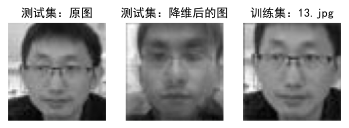

In [27]:

#使用测试集图片进行测试
name = 0
img = Image.open("DataProcessed_Student/test/" + str(name) + ".jpg")
imgGray = img.convert('L')
test =  np.array(imgGray).reshape([1, -1])
processedTest = TransformPCA(test, eigenvectorSubset, np.mean(data, axis=0))
#print(processedTest.shape)
verify = processedTest


dis = []
minDis = 1e9
for i in range(processedTrain.shape[0]):
    dis.append(d_ou(processedTrain[i],verify[0]))
    print("与训练集的第", i, "张照片的欧氏距离为：", dis[i])
    if (dis[i] < minDis):
        minDis = dis[i]
        ansName = i
print("与测试图片欧氏距离最小的是", ansName, ".jpg")
#可视化
rawImg = test.reshape(50,50)
rawImg = Image.fromarray(rawImg)
rawImg = rawImg.convert('L')

inverseData = InversePCA(processedTest, eigenvectorSubset, np.mean(data, axis=0))
inverseImg = inverseData[0].reshape(50,50)
inverseImg = Image.fromarray(inverseImg)
inverseImg = inverseImg.convert('L')

trainImg = Image.open("DataProcessed_Student/train/" + str(ansName) + ".jpg")

fig = plt.figure()
ax0 = fig.add_subplot(231)
ax0.axis('off')
ax0.set_title("测试集：原图")
ax0.imshow(rawImg, cmap = "gray")
ax1 = fig.add_subplot(232)
ax1.axis('off')
ax1.set_title("测试集：降维后的图")
ax1.imshow(inverseImg, cmap = "gray")
ax2 = fig.add_subplot(233)
ax2.axis('off')
ax2.set_title("训练集："+ str(ansName) + ".jpg")
ax2.imshow(trainImg, cmap = "gray")